### Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [1]:
import pandas as pd

In [5]:
transaction_data = pd.read_csv(r'C:\Users\arkhi\Jupyter notebook\data\transaction_data.csv')

In [7]:
transaction_data.shape

(5315, 3)

In [8]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [14]:
transaction_data.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [16]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


- Какие значения находятся в колонке transaction? 
- Сколько наблюдений относятся к тому или иному уровню? 
- Визуализируйте результат с помощью барплота. 
- Подумайте, как можно улучшить график.

In [25]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [34]:
types_transaction = transaction_data.groupby('transaction', as_index = False).agg({'name':'count'})
types_transaction

,transaction,name
0,cancelled,1619
1,error,4
2,successfull,3692


In [35]:
import seaborn as sns

<AxesSubplot:xlabel='transaction', ylabel='name'>

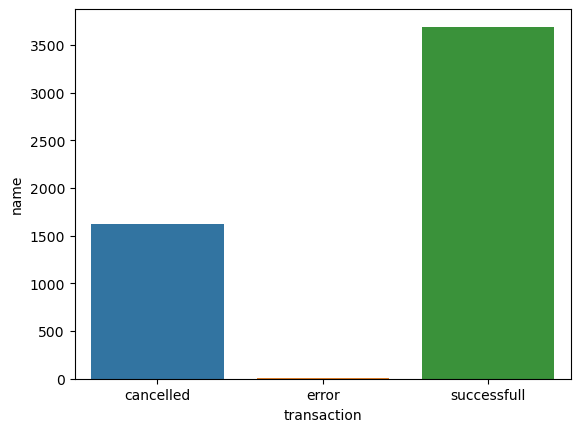

In [36]:
sns.barplot(data = types_transaction, x = 'transaction', y = 'name')

### Сколько транзакций завершились ошибкой?

In [39]:
types_transaction.query('transaction == "error"')

,transaction,name
1,error,4


### Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [44]:
successfull_transactions = (transaction_data
                            .query('transaction == "successfull"')
                            .groupby('name')
                            .agg({'transaction':'count'})
                           )

C:\Users\arkhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

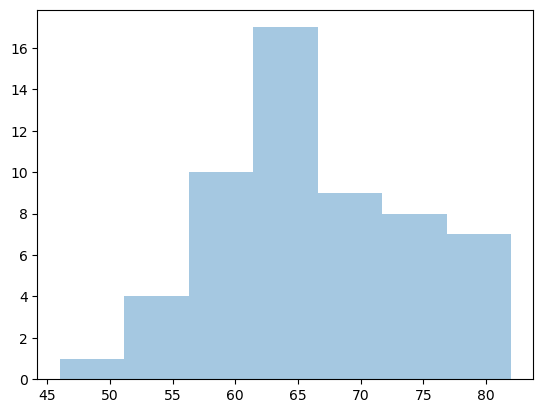

In [48]:
sns.distplot(successfull_transactions, kde = False)

In [49]:
successfull_transactions.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


### Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [50]:
transaction_data_updated = pd.read_csv(r'C:\Users\arkhi\Jupyter notebook\data\transaction_data_updated.csv')

In [58]:
transaction_data_updated.isna().sum()

date           0
name           0
transaction    0
minute         0
dtype: int64

In [71]:
# первый метод  черех .pivot
user_vs_minute_pivot = (transaction_data_updated
                                                .groupby(['name', 'minute'], as_index = False)
                                                .agg({'transaction':'count'})
                                                .pivot(index = 'minute', columns = 'name', values = 'transaction')
                                                .fillna(0)
                                               )

In [76]:
# второй метод через picot_table
transaction_data_updated.pivot_table(index = 'minute', 
                                     columns = 'name', 
                                     values = 'transaction',
                                     aggfunc = 'count', 
                                     fill_value = '0')

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0,3.0,1.0,1.0,4.0,1.0,3.0,0,0,1.0
1,4.0,4.0,0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0,0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0,1.0,2.0,1.0,3.0,1.0
3,3.0,0,2.0,0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0,3.0,4.0,1.0,0
4,3.0,0,0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0,1.0
5,3.0,0,2.0,3.0,1.0,0,5.0,3.0,1.0,3.0,...,0,2.0,3.0,1.0,0,0,3.0,0,2.0,1.0
6,4.0,1.0,2.0,2.0,0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0,3.0,2.0,1.0,1.0,0,...,0,1.0,0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


### Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

<AxesSubplot:xlabel='minute'>

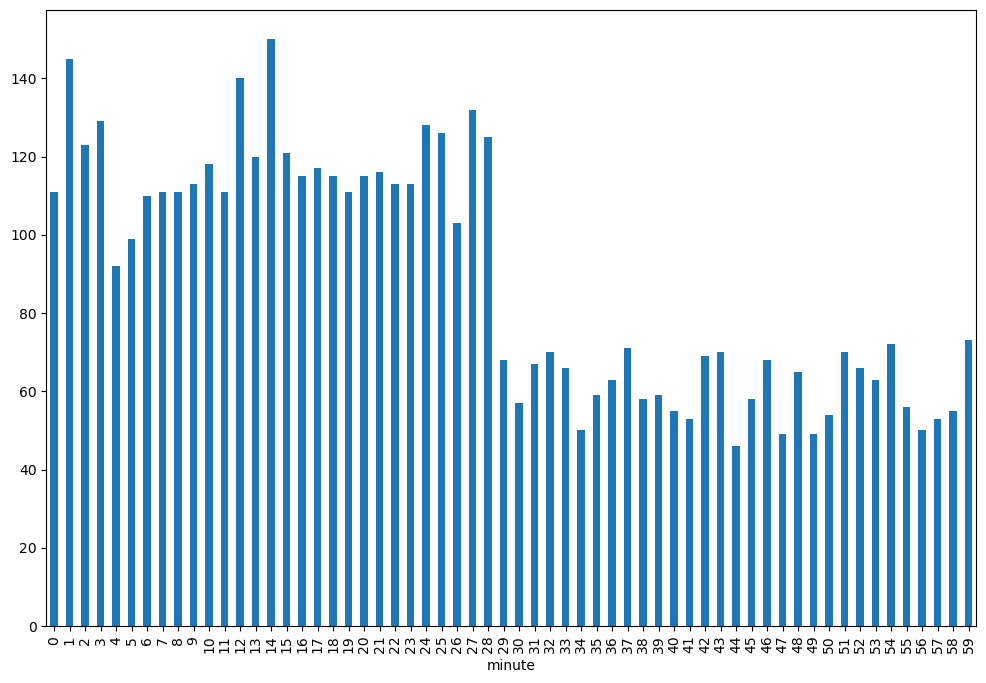

In [81]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize =(12,8))

In [85]:
transaction_data_updated.date.min()

'2020-03-02 00:00:00'

In [86]:
transaction_data_updated.date.max()

'2020-03-02 01:29:05'

In [88]:
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated.date)

In [96]:
transaction_data_updated['true_minutes'] = transaction_data_updated.date.dt.minute + transaction_data_updated.date.dt.hour*60

<AxesSubplot:ylabel='Frequency'>

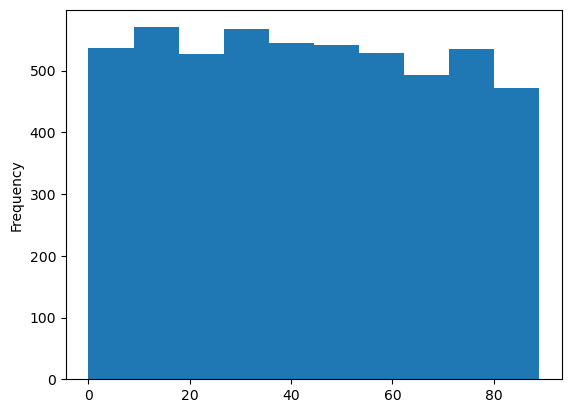

In [97]:
transaction_data_updated['true_minutes'].plot.hist()

# That's all!!